In [9]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [10]:
def parse_data(data_file):
    new_list = []
    with open(data_file) as f:
        reader = csv.reader(f, delimiter = "\t")
        for row in reader:
            new_list.append(row)
    return new_list

    
# Takes the data and plots it on the same plot
def plot_data_together(listX, Y_master_list, title):
    for i in range(len(Y_master_list)):
        plt.plot(listX, Y_master_list[i])
    plt.xlabel("Days")
    plt.title(title)
    plt.show()
    
    
# Given a list of data sets, plots them on individual graphs
def plot_data_separate(listX, Y_master_list):
    fig = plt.figure(1, figsize = (20, 75))
    length = len(Y_master_list)
    plot_height = math.ceil(length / 2)
    for i in range(1, length):
        plt.subplot(plot_height, 2, (i))
        plt.plot(listX, Y_master_list[i])
    plt.show()
    
    
# Splits the master list into two lists, one with leaf data, one with apex data
def split_lists_by_tissue(master_list):
    leaf_list = []
    apex_list = []
    for i in range(0, len(master_list)):
        if master_list[i][1] == "leaf":
            leaf_list.append(master_list[i])
        else:
            apex_list.append(master_list[i])
    return leaf_list, apex_list   
    

# Splits the list into two - for 'westar' and 'tapidor' samples    
def split_lists_by_species(input_list):
    tapidor_list = []
    westar_list = []
    for i in range(0, len(input_list)):
        if input_list[i][2] == "tapidor":
            tapidor_list.append(input_list[i])
        else:
            westar_list.append(input_list[i])
    
    return tapidor_list, westar_list
    
    
# Delete the "NA"s in the tapidor sample 
def clean_data(input_list):
    if input_list[0][2] == "tapidor": 
    
        for i in range(len(input_list)):
            del input_list[i][8]
    
    elif input_list[0][2] == "westar":
        for i in range(len(input_list)):
            del input_list[i][-1]
                
        if input_list[0][1] == "leaf":
        
            for i in range(len(input_list)):
                del input_list[i][8]    
        
    return input_list
        
    
# Removes all data with a 0 value
def remove_zero_data(input_list):
    for i in range((len(input_list) - 1), -1, -1):
        if "0" in input_list[i]:
            del input_list[i]
    return input_list      
       

#finds the maximum value in each sublist    
def max_and_min(input_list):
    maximums = []
    minimums = []
    for i in range(len(input_list)):
        t = 0
        for j in range(3, len(input_list[i])):
            if float(input_list[i][j]) > float(t):
                t = input_list[i][j]
        maximums.append(t)
    for i in range(len(input_list)):
        t = maximums[i]
        for j in range(3, len(input_list[i])):
            if float(input_list[i][j]) < float(t):
                t = input_list[i][j]
        minimums.append(t)
    return maximums, minimums   


# Takes a list of data and normalises it, retaining the gene name etc.
def normalise_list(input_list, maxes, mins):
    headings = [[input_list[i][j]
                for j in range(3)]
                for i in range (len(input_list))]
    
    def normalise_values(num, _max, _min):
        return (float(num) - float(_min))/(float(_max) - float(_min))
    
    values = [
               [normalise_values(input_list[i][j], maxes[i], mins[i])
                for j in range(3, len(input_list[i]))]
                for i in range(len(input_list))
    ]
    for i in range(len(input_list)):
        headings[i].extend(values[i])
    return headings


# Given a normalised list of data, returns those those with their maximum at a particular day
def select_max_at_n(input_list, max_day):
    n = 0
    if max_day == 22:
        n = 3
    elif max_day == 43:
        n = 4
    elif max_day == 64:
        n = 5
    elif max_day == 65:
        n = 6
    elif max_day == 67:
        n = 7
    elif max_day == 69:
        if "westar" in input_list[0] and "apex" in input_list[0]:
            n = 8
        else:
            print("The selected day is not available for that data")
    elif max_day == 72:
        if "westar" in input_list[0] and "apex" in input_list[0]:
            n = 9
        else:
            n = 8
    elif max_day == 83:
        if "tapidor" in input_list[0]:
            n = 9
        else:
            print("The selected day is not available for that data")
    new_list = [
               [input_list[i][j]
                for j in range(len(input_list[i]))]
                for i in range (len(input_list))
                if input_list[i][n] == 1.0
        ]
    length = len(new_list)
    
    return new_list, length

def select_min_at_n(input_list, min_day):
    n = 0
    if min_day == 22:
        n = 3
    elif min_day == 43:
        n = 4
    elif min_day == 64:
        n = 5
    elif min_day == 65:
        n = 6
    elif min_day == 67:
        n = 7
    elif min_day == 69:
        if "westar" in input_list[0] and "apex" in input_list[0]:
            n = 8
        else:
            print("The selected day is not available for that data")
    elif min_day == 72:
        #print(input_list)
        if "westar" in input_list[0] and "apex" in input_list[0]:
            print(True)
            n = 9
        else:
            n = 8
    elif min_day == 83:
        if "tapidor" in input_list[0]:
            n = 9
        else:
            print("The selected day is not available for that data")
    new_list = [
               [input_list[i][j]
                for j in range(len(input_list[i]))]
                for i in range (len(input_list))
                if input_list[i][n] == 0
        ]
    length = len(new_list)
    
    return new_list, length

# Removes the first 3 indexes of the data - the gene name etc.
def remove_names(input_list):
    new_list = [
               [input_list[i][j]
                for j in range(3, len(input_list[i]))]
                for i in range (len(input_list))
        ]
    return new_list

def plot_normalised_data():   
    plot_data_together(tapidor_days, remove_names(normalised_t_l), "Normalised data from Tapidor leaf")
    plot_data_together(tapidor_days, remove_names(normalised_t_a), "Normalised data from Tapidor apex")
    plot_data_together(westar_leaf_days, remove_names(normalised_w_l), "Normalised data from Westar leaf")
    plot_data_together(westar_apex_days, remove_names(normalised_w_a), "Normalised from Westar apex")
    
def plot_normalised_data_max(max_day):
    normalised_t_l_max, length_t_l_max = select_max_at_n(normalised_t_l, max_day)
    normalised_t_a_max, length_t_a_max = select_max_at_n(normalised_t_a, max_day)
    normalised_w_l_max, length_w_l_max = select_max_at_n(normalised_w_l, max_day)
    normalised_w_a_max, length_w_a_max = select_max_at_n(normalised_w_a, max_day)
    
    plot_data_together(tapidor_days, remove_names(normalised_t_l_max), 
                       ("Normalised data from Tapidor leaf with max at %s days\n (%s sets of data)") 
                       % (max_day, length_t_l_max))
    
    plot_data_together(tapidor_days, remove_names(normalised_t_a_max), 
                       ("Normalised data from Tapidor apex with max at %s days\n (%s sets of data)") 
                       % (max_day, length_t_a_max))
    
    plot_data_together(westar_leaf_days, remove_names(normalised_w_l_max), 
                       ("Normalised data from Westar leaf with max at %s days\n (%s sets of data)") 
                       % (max_day, length_w_l_max))
    
    plot_data_together(westar_apex_days, remove_names(normalised_w_a_max), 
                       ("Normalised data from Westar apex with max at %s days\n (%s sets of data)") 
                       % (max_day, length_w_a_max))

def plot_normalised_data_min(min_day):
    normalised_t_l_min, length_t_l_min = select_min_at_n(normalised_t_l, min_day)
    normalised_t_a_min, length_t_a_min = select_min_at_n(normalised_t_a, min_day)
    normalised_w_l_min, length_w_l_min = select_min_at_n(normalised_w_l, min_day)
    normalised_w_a_min, length_w_a_min = select_min_at_n(normalised_w_a, min_day)
    
    plot_data_together(tapidor_days, remove_names(normalised_t_l_min), 
                       ("Normalised data from Tapidor leaf with min at %s days\n (%s sets of data)") 
                       % (min_day, length_t_l_min))
    
    plot_data_together(tapidor_days, remove_names(normalised_t_a_min), (
            "Normalised data from Tapidor apex with min at %s days\n (%s sets of data)") 
                       % (min_day, length_t_a_min))
    
    plot_data_together(westar_leaf_days, remove_names(normalised_w_l_min), 
                       ("Normalised data from Westar leaf with min at %s days\n (%s sets of data)") 
                       % (min_day, length_w_l_min))
    
    plot_data_together(westar_apex_days, remove_names(normalised_w_a_min), 
                       ("Normalised data from Westar apex with min at %s days\n (%s sets of data)") 
                       % (min_day, length_w_a_min))
       
def plot_normalised_data_max_min(max_day, min_day):
    normalised_t_l_max_min, length_t_l_max_min = select_max_at_n(normalised_t_l, max_day)
    normalised_t_l_max_min, length_t_l_max_min = select_min_at_n(normalised_t_l_max_min, min_day)
    
    normalised_t_a_max_min, length_t_a_max_min = select_max_at_n(normalised_t_a, max_day)
    normalised_t_a_max_min, length_t_a_max_min = select_min_at_n(normalised_t_a_max_min, min_day)
    
    normalised_w_l_max_min, length_w_l_max_min = select_max_at_n(normalised_w_l, max_day)
    normalised_w_l_max_min, length_w_l_max_min = select_min_at_n(normalised_w_l_max_min, min_day)
    
    normalised_w_a_max_min, length_w_a_max_min = select_max_at_n(normalised_w_a, max_day)
    normalised_w_a_max_min, length_w_a_max_min = select_min_at_n(normalised_w_a_max_min, min_day)
    
    plot_data_together(tapidor_days, remove_names(normalised_t_l_max_min), 
                       ("Normalised data from Tapidor leaf with max at %s days and min at %s days\n (%s sets of data)") % (max_day, min_day, length_t_l_max_min))
    
    plot_data_together(tapidor_days, remove_names(normalised_t_a_max_min), 
                       ("Normalised data from Tapidor apex with max at %s days and min at %s days\n (%s sets of data)") % (max_day, min_day, length_t_a_max_min))
    
    plot_data_together(westar_leaf_days, remove_names(normalised_w_l_max_min), 
                       ("Normalised data from Westar leaf with max at %s days and min at %s days\n (%s sets of data)") % (max_day, min_day, length_w_l_max_min))
    
    plot_data_together(westar_apex_days, remove_names(normalised_w_a_max_min), 
                       ("Normalised data from Westar apex with max at %s days and min at %s days\n (%s sets of data)") % (max_day, min_day, length_w_a_max_min))  
    
def plot_gene_data(listX, listY, chosen_gene_data, gene, print_names):
    if len(listY) == 0:
        print("%s has no matches within the threshold\n" % gene)
        return
    gene_names = [listY[i][0] for i in range(len(listY))]
    chosen_gene_data = [chosen_gene_data[i] for i in range(3, len(chosen_gene_data))]
    plt.plot(listX, chosen_gene_data, linewidth=3, label = gene)
    plt.legend()
    plot_data_together(listX, remove_names(listY),
                       ("Gene %s has %s match(es) in the given threshold\n"
                        % (gene, len(listY))))
    if print_names == "y":
        print(gene_names, "\n")
    
    
# Returns a list with similar data to that inputted
#def compare_data(input_list, num, thresh): #where num is index in input_list to compare all other data to
#    compare_list = input_list[num]
#    new_list = [[abs(float(compare_list[j]) - float(input_list[i][j])) for j in range(3, len(input_list[i]))] for i in range(len(input_list))]
#    #print(new_list)
#    similar_data = [input_list[i] 
#                    for i in range(len(input_list))
#                    if np.mean(new_list[i]) < thresh and i != num]
#    return(similar_data)


# Returns a list of similar data within the threshold given
def compare_data_by_gene(input_list, gene, thresh):
    chosen_gene_data = []
    num = 0
    for i in range(len(input_list)):
        if gene in input_list[i]: # Finding the index in input_list that contains the data for that gene
            num = i
            chosen_gene_data = input_list[i]
            break
    new_list = [[((float(chosen_gene_data[j]) - float(input_list[i][j]))**2)
                for j in range(3, len(input_list[i]))]
                for i in range(len(input_list))]
    similar_data = [input_list[i] 
                    for i in range(len(input_list))
                    if np.mean(new_list[i]) < thresh and i != num]
    return(similar_data, chosen_gene_data)
    

    
master_days = [22, 43, 64, 65, 67, 69, 72, 83]
tapidor_days = [22, 43, 64, 65, 67, 72, 83]
westar_apex_days = [22, 43, 64, 65, 67, 69, 72]
westar_leaf_days = [22, 43, 64, 65, 67, 72]

gene_data = parse_data("C:\\Users\\browndo\\Documents\\brassica_flowering_expression.tsv")

del gene_data[0] #removes the 'header' with the column titles etc.

master_leaf_list, master_apex_list = split_lists_by_tissue(gene_data)

tapidor_leaf, westar_leaf = split_lists_by_species(master_leaf_list)
tapidor_apex, westar_apex = split_lists_by_species(master_apex_list)

tapidor_leaf = remove_zero_data(clean_data(tapidor_leaf))
tapidor_apex = remove_zero_data(clean_data(tapidor_apex))
westar_leaf = remove_zero_data(clean_data(westar_leaf))
westar_apex = remove_zero_data(clean_data(westar_apex))

maxes_t_l, mins_t_l = max_and_min(tapidor_leaf)
maxes_t_a, mins_t_a = max_and_min(tapidor_apex)
maxes_w_l, mins_w_l = max_and_min(westar_leaf)
maxes_w_a, mins_w_a = max_and_min(westar_apex)

normalised_t_l = normalise_list(tapidor_leaf, maxes_t_l, mins_t_l)
normalised_t_a = normalise_list(tapidor_apex, maxes_t_a, mins_t_a)
normalised_w_l = normalise_list(westar_leaf, maxes_w_l, mins_w_l)
normalised_w_a = normalise_list(westar_apex, maxes_w_a, mins_w_a)


In [11]:
#tests

def test_all():
    gene_data = parse_data("C:\\Users\\browndo\\Documents\\brassica_flowering_expression.tsv")
    master_leaf_list, master_apex_list = split_lists_by_tissue(gene_data)
    
    for i in range(len(master_leaf_list)):
        if "apex" in master_leaf_list[i]:
            return False
        
    tapidor_leaf, westar_leaf = split_lists_by_species(master_leaf_list)
    for i in range(len(tapidor_leaf)):
        if "apex" in tapidor_leaf[i]:
            return False
        
    tapidor_leaf = remove_zero_data(clean_data(tapidor_leaf))
    for i in range(len(tapidor_leaf)):
        if "0" in tapidor_leaf[i]:
            return False
    
    tapidor_leaf = remove_names(tapidor_leaf)
    for i in range(len(tapidor_leaf)):
        for j in range(len(tapidor_leaf[i])):
            try:
                float(tapidor_leaf[i][j])
            except ValueError:
                return False
    
    return True
        
test_all()

True

1274
100
XLOC_000007 has no matches within the threshold

XLOC_000031 has no matches within the threshold

XLOC_000147 has no matches within the threshold

XLOC_000204 has no matches within the threshold

XLOC_000340 has no matches within the threshold

XLOC_000363 has no matches within the threshold

XLOC_000419 has no matches within the threshold



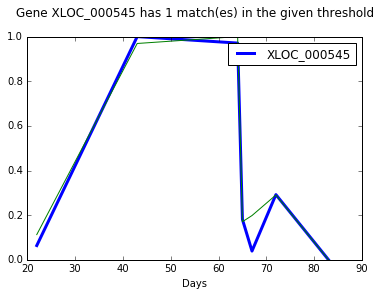

XLOC_000615 has no matches within the threshold

XLOC_000737 has no matches within the threshold

XLOC_000773 has no matches within the threshold



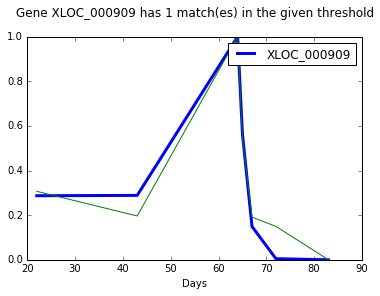

XLOC_000944 has no matches within the threshold

XLOC_000945 has no matches within the threshold



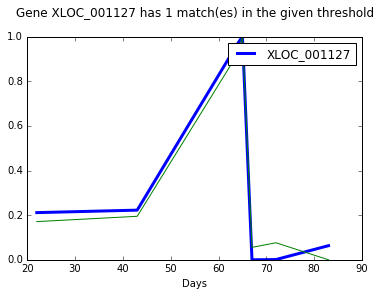

XLOC_001612 has no matches within the threshold

XLOC_001661 has no matches within the threshold

XLOC_001774 has no matches within the threshold



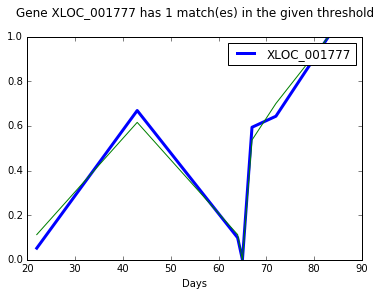

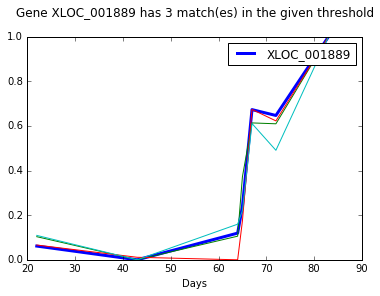

XLOC_002010 has no matches within the threshold

XLOC_002107 has no matches within the threshold

XLOC_002180 has no matches within the threshold

XLOC_002207 has no matches within the threshold

XLOC_002236 has no matches within the threshold

XLOC_002386 has no matches within the threshold

XLOC_002479 has no matches within the threshold

XLOC_002583 has no matches within the threshold

XLOC_002649 has no matches within the threshold

XLOC_002743 has no matches within the threshold

XLOC_002796 has no matches within the threshold

XLOC_002821 has no matches within the threshold

XLOC_002852 has no matches within the threshold

XLOC_002857 has no matches within the threshold



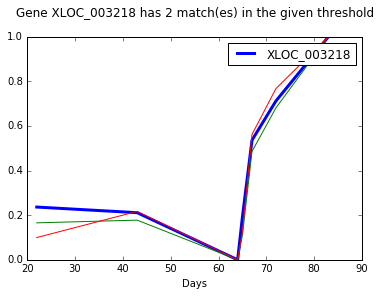

XLOC_003584 has no matches within the threshold

XLOC_003692 has no matches within the threshold



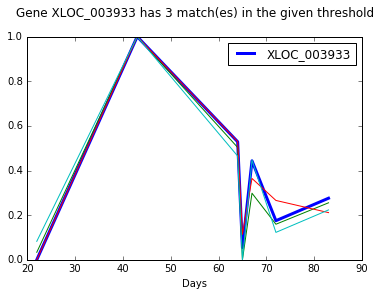

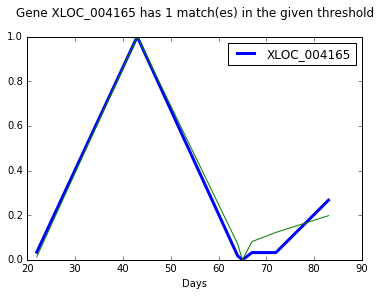

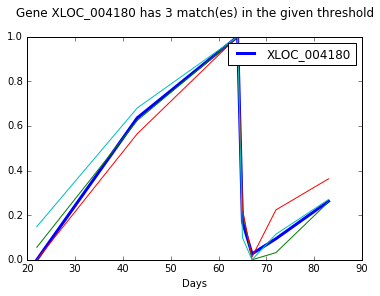

XLOC_004233 has no matches within the threshold

XLOC_004261 has no matches within the threshold

XLOC_004342 has no matches within the threshold



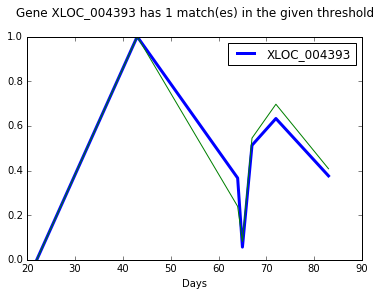

XLOC_004422 has no matches within the threshold

XLOC_004432 has no matches within the threshold



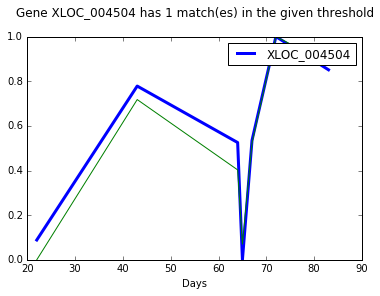

XLOC_004661 has no matches within the threshold

XLOC_004677 has no matches within the threshold

XLOC_004724 has no matches within the threshold

XLOC_004804 has no matches within the threshold

XLOC_005037 has no matches within the threshold



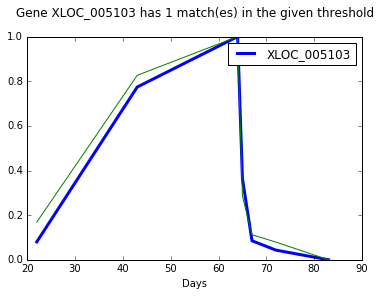

XLOC_005275 has no matches within the threshold

XLOC_005434 has no matches within the threshold

XLOC_005442 has no matches within the threshold

XLOC_005533 has no matches within the threshold



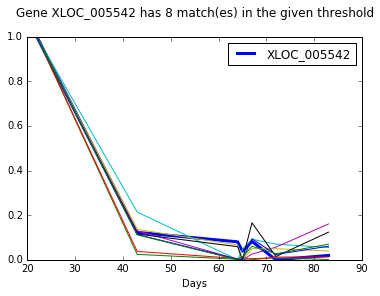

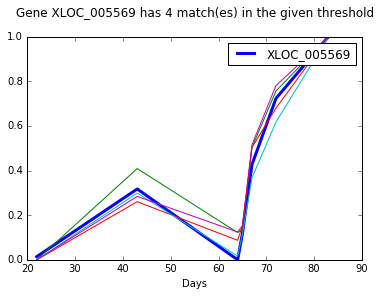

XLOC_005740 has no matches within the threshold

XLOC_005833 has no matches within the threshold

XLOC_005921 has no matches within the threshold

XLOC_006060 has no matches within the threshold

XLOC_006061 has no matches within the threshold



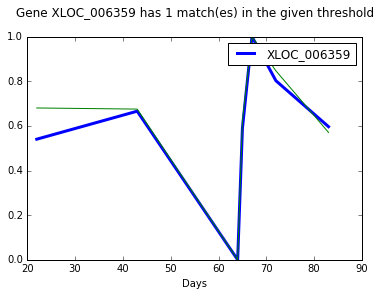

XLOC_006401 has no matches within the threshold



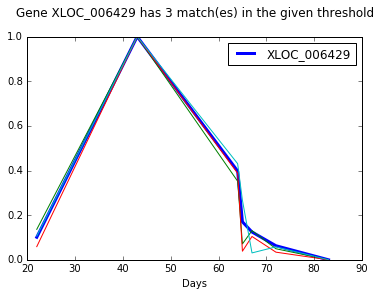

XLOC_006505 has no matches within the threshold

XLOC_006615 has no matches within the threshold



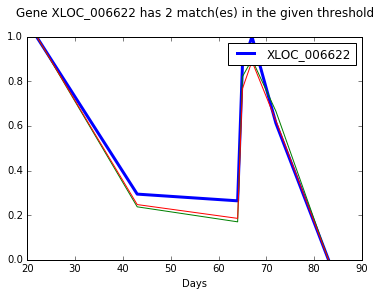

XLOC_006663 has no matches within the threshold



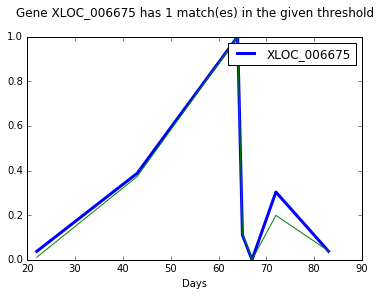

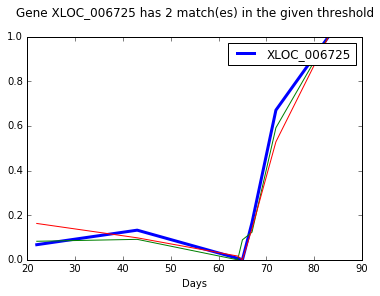

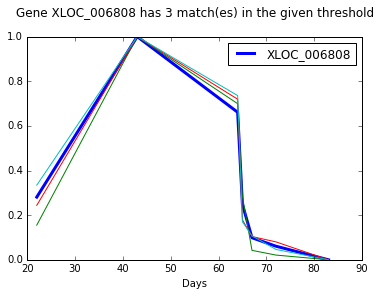

XLOC_006824 has no matches within the threshold



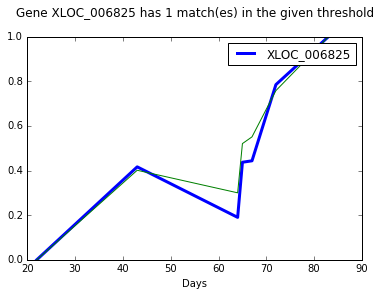

XLOC_006826 has no matches within the threshold

XLOC_006862 has no matches within the threshold

XLOC_006924 has no matches within the threshold

XLOC_006926 has no matches within the threshold



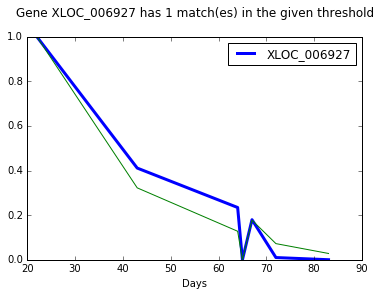

XLOC_006929 has no matches within the threshold



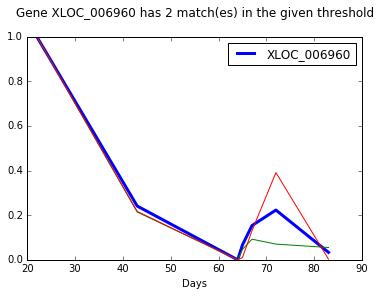

XLOC_007016 has no matches within the threshold

XLOC_007039 has no matches within the threshold



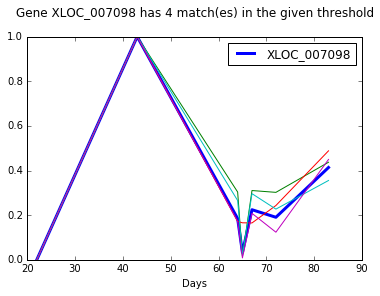

XLOC_007163 has no matches within the threshold

XLOC_007165 has no matches within the threshold



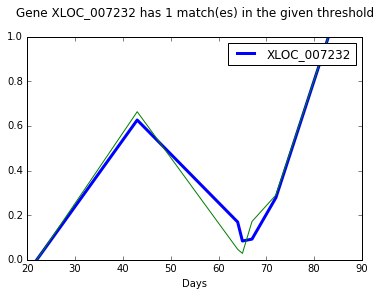

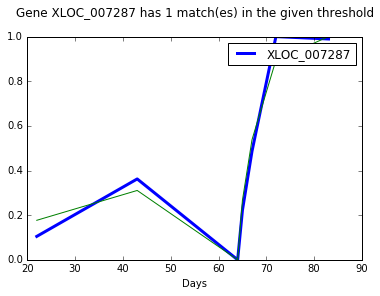

XLOC_007297 has no matches within the threshold

XLOC_007557 has no matches within the threshold



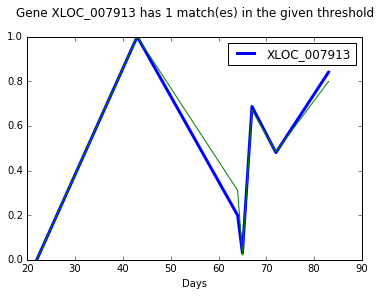

XLOC_007935 has no matches within the threshold

XLOC_008038 has no matches within the threshold

XLOC_008040 has no matches within the threshold

XLOC_008164 has no matches within the threshold

XLOC_008595 has no matches within the threshold

XLOC_008632 has no matches within the threshold

XLOC_008713 has no matches within the threshold



In [13]:
#plot_normalised_data()
#for i in master_days:
#    plot_normalised_data_max(i)
#plot_normalised_data_max(72)
#plot_normalised_data_min(69)

#for i in master_days:
#    for j in master_days:
#        if i != j:
#            plot_normalised_data_max_min(i, j)
#            print("-" * 20)
#    print("-" * 100)

#plot_normalised_data_max_min(43, 67)

#plt.plot(tapidor_days, remove_names(normalised_t_l[i]))

gene_names = [normalised_t_l[i][0] for i in range(len(normalised_t_l))]
print(len(gene_names))

some_genes = [gene_names[i] for i in range(0, 100)]
print(len(some_genes))
for gene in some_genes:                                                       #threshold value  
    similar_data, chosen_gene_data = compare_data_by_gene(normalised_t_l, gene, 0.005)
    plot_gene_data(tapidor_days, similar_data, chosen_gene_data, gene, "n")

# Find matches for a particular gene in a given threshold
#similar_data, chosen_gene_data = compare_data_by_gene(normalised_t_a, "XLOC_003933", 0.005)
#plot_gene_data(tapidor_days, similar_data, chosen_gene_data, "XLOC_003933", "y")


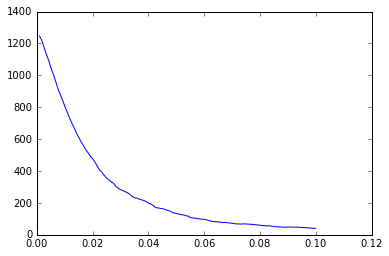

In [17]:
x = [['XLOC_000773', 'leaf', 'tapidor', 1.0, 0.45180486898046307, 0.22252502972073757, 0.5209114727352289, 0.45358238342276797, 0.0455124339002733, 0.0], ['XLOC_018039', 'leaf', 'tapidor', 1.0, 0.1761144788356237, 0.0, 0.2938955112145478, 0.5111713095010054, 0.12770974454732806, 0.1151002599826343], ['XLOC_020335', 'leaf', 'tapidor', 1.0, 0.4374037460978147, 0.0, 0.36168678459937564, 0.5653590010405827, 0.14925182101977105, 0.17662903225806448], ['XLOC_020486', 'leaf', 'tapidor', 1.0, 0.5355528445041287, 0.12770230196947302, 0.4766438139371945, 0.5339088000934187, 0.21466764182571912, 0.0], ['XLOC_052558', 'leaf', 'tapidor', 1.0, 0.297762224291264, 0.0, 0.4844511509936752, 0.39054162519664803, 0.12692073072848103, 0.11954923427617418], ['XLOC_072716', 'leaf', 'tapidor', 1.0, 0.36381777400882925, 0.22092471098277466, 0.13024973554633604, 0.3826198089207168, 0.08639166688687791, 0.0]]
y = [['XLOC_010023', 'leaf', 'tapidor', 0.03484851504572296, 1.0, 0.9085517028415391, 0.18227203539215267, 0.0011213726177135112, 0.0, 0.004577457432863517], ['XLOC_010644', 'leaf', 'tapidor', 0.16869856623611099, 0.8264553516833335, 1.0, 0.28622811241984547, 0.11218966139150775, 0.07936978428922951, 0.0], ['XLOC_016359', 'leaf', 'tapidor', 0.11295094763407712, 0.9691845379686107, 1.0, 0.17062966836663856, 0.19823338670813234, 0.29033113972164887, 0.0], ['XLOC_042573', 'leaf', 'tapidor', 0.0, 0.8395346409694349, 1.0, 0.16603562311991732, 0.00554179595942349, 0.286237557054877, 0.0607509892675152], ['XLOC_047307', 'leaf', 'tapidor', 0.0, 0.9029416643471857, 1.0, 0.3501994753755451, 0.1975326343963586, 0.35524610397460654, 0.17923825428822854]]

#normalised_t_l = normalise_list(tapidor_leaf, maxes_t_l, mins_t_l)
#genes_left = normalised_t_l
#if len(genes_left) != 1274:
#    print(False)
#else:
#    print(True)

#print(len(genes_left), "\n")
    
#print(normalised_t_l)
    
#def remove_clusters(chosen_gene_data, input_list, clusters):
#    to_delete = []
#    del normalised_t_l_test[0]
#    for i in range(len(input_list)):
#        for j in range(len(normalised_t_l_test)):
#                if input_list[i][0] in normalised_t_l_test[j]:
#                    to_delete.append(j)
#    #print(len(normalised_t_l_test))                
#    to_delete = sorted(to_delete, reverse=True)
#    #print(to_delete)
#    for i in to_delete:
#        del normalised_t_l_test[i]
#    clusters += 1
#    return clusters, len(normalised_t_l_test)
#      
#    
#def compare_data_by_gene(input_list, gene, thresh):
#    #print(input_list)
#    chosen_gene_data = []
#    num = 0
#    for i in range(len(input_list)):
#        if gene in input_list[i]: # Finding the index in input_list that contains the data for that gene
#            num = i
#            chosen_gene_data = input_list[i]
#            break
#    new_list = [[((float(chosen_gene_data[j]) - float(input_list[i][j]))**2)
#                for j in range(3, len(input_list[i]))]
#                for i in range(len(input_list))]
#    #print(new_list)
#    similar_data = [input_list[i] 
#                    for i in range(len(input_list))
#                    if np.mean(new_list[i]) < thresh and i != num]
#    return(similar_data, chosen_gene_data)


#def function(thresh, gene, clusters):
#    gene_names = [normalised_t_l_test[i][0] for i in range(len(normalised_t_l_test))]
#    #print(gene_names) # Good up to here
#    similar_data, chosen_gene_data = compare_data_by_gene(normalised_t_l_test, gene, thresh)
#    #print(similar_data)
#    clusters, temp = remove_clusters(chosen_gene_data, similar_data, clusters)
#    #print(temp)
#    print(clusters)

#clusters = 0
#for i in range(len(normalised_t_l_test)):
    #print(len(normalised_t_l_test))
#function(0.05, normalised_t_l_test[i][0], clusters)

def number_of_clusters(thresh):
    normalised_t_l = normalise_list(tapidor_leaf, maxes_t_l, mins_t_l)
    genes_left = normalised_t_l
    clusters = 0

    while len(genes_left) > 0:
        gene_names = [genes_left[i][0] for i in range (len(genes_left))]
        chosen_gene = gene_names[0][0]
        chosen_gene_data = genes_left[0]
        num = 0
        #print(chosen_gene_data)
        #print(genes_left)
        new_list = [[((float(chosen_gene_data[j]) - float(genes_left[i][j]))**2)
                    for j in range(3, len(genes_left[i]))]
                    for i in range(len(genes_left))]
        #print(new_list)
        similar_data = []
        similar_data = [genes_left[i] 
                        for i in range(len(genes_left))
                        if np.mean(new_list[i]) < thresh and i != num]
        #print(similar_data)
        to_delete = []
        del genes_left[0]
        for i in range(len(similar_data)):
            for j in range(len(genes_left)):
                    if similar_data[i][0] in genes_left[j]:
                        to_delete.append(j)
        #print(len(normalised_t_l_test))                
        to_delete = sorted(to_delete, reverse=True)
        for i in to_delete:
            del genes_left[i]
        clusters += 1
        #print(len(genes_left), len(similar_data) + 1, clusters)
        #print(clusters)
    return clusters

cluster_data = []
thresh_data = []
for i in np.linspace(0.001, 0.1, 120):
    #print(i)
    thresh_data.append(i)
    cluster_data.append(number_of_clusters(i))
    
plt.plot(thresh_data, cluster_data)
plt.show()
    